# Gated Recurrent Unit
在过去的几年里，门控递归单元（GRU）已经成为时间序列数据建模的一个令人兴奋的新工具。它们的参数比LSTM少，但往往能提供类似或更优越的性能。就像LSTM一样，GRU控制信息流，但不需要使用记忆单元。
## The Gated Recurrent Unit in a Nutshell
GRU 有两个有两个门，即一个重置门（reset gate）和一个更新门（update gate）。从直观上来说，重置门决定了如何将新的输入信息与前面的记忆相结合，更新门定义了前面记忆保存到当前时间步的量。如果我们将重置门设置为 1，更新门设置为 0，那么我们将再次获得标准 RNN 模型。使用门控机制学习长期依赖关系的基本思想和 LSTM 一致，但还是有一些关键区别：

- GRU 有两个门（重置门与更新门），而 LSTM 有三个门（输入门、遗忘门和输出门）。
- GRU 并不会控制并保留内部记忆（c_t），且没有 LSTM 中的输出门。
- LSTM 中的输入与遗忘门对应于 GRU 的更新门，重置门直接作用于前面的隐藏状态。
- 在计算输出时并不应用二阶非线性。

In [1]:
%%html
<img src='10_1.png'> 

## The Reset Gate
重置门决定如何将新的输入xt与之前的隐藏状态ht-1相结合。它使模型有能力阻止或传递前一个隐藏状态的信息。这允许GRU在之前的隐藏状态不再相关时，"重置"自己。重置门直接应用于之前的隐藏状态。
## The Update Gate
更新门帮助GRU捕获长期依赖性。它决定在当前的隐藏状态$h_t$中保留多少以前的隐藏状态$h_{t-1}$。换句话说，它通过控制多少以前的记忆内容要被遗忘，多少新的记忆内容要被添加，来控制过去的隐藏状态在时间t的相关程度。
每当内存内容被认为对以后的使用很重要时，更新门就会被关闭。这使得GRU能够将当前的内存内容跨越多个时间步骤，从而捕捉到长期的依赖性。

最后的存储器或激活量$h_t$是当前新的存储器内容$h_t'$和以前的存储器激活量$h_{t-1}$的加权组合，其中权重由更新门$z_t$的值决定。
## Final Memory
在GRU中，隐藏激活（最终记忆）只是前一个隐藏激活（新的记忆内容）的线性插值，权重由更新门决定。
## A Simple Approach to Gated Recurrent Unit Construction
我们仍然使用第9章中的数据

In [3]:
import numpy as np 
import pandas as pd 
data = pd.read_csv("SN_m_tot_V2.0.csv", sep=";")
data.to_csv("Monthly Sunspots.csv")
data_csv = pd.read_csv("Monthly Sunspots.csv", header=None)
yt = data_csv.iloc[0:3263, 4]
yt_1 = yt.shift(1)
yt_2 = yt.shift(2)
yt_3 = yt.shift(3)
yt_4 = yt.shift(4)
yt_5 = yt.shift(5)
data = pd.concat ([ yt, yt_1, yt_2, yt_3, yt_4,yt_5], axis=1)
data.columns = ['yt', 'yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']
data = data.dropna()
y = data['yt']
cols = ['yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']
x = data[ cols ]
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler(feature_range = ( -1 , 1))
x = np.array(x).reshape(( len(x), 5 ))
x = scaler_x.fit_transform(x)
scaler_y = preprocessing.MinMaxScaler(feature_range = ( -1 , 1))
y = np.array(y).reshape(( len(y), 1))
y = scaler_y.fit_transform(y)
train_end = 3084
x_train = x[0:train_end, ]
x_test = x[train_end+1:3252, ]
y_train = y[0:train_end]
y_test = y[train_end+1:3252]
x_train = x_train.reshape(x_train.shape + (1 ,))
x_test = x_test.reshape(x_test.shape + (1 ,))

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense ,Activation
from keras.layers.recurrent import GRU
seed = 2020
np.random.seed(seed)
fit1 = Sequential()
fit1.add(GRU(units=4, return_sequences = False ,
             activation = 'tanh',
             recurrent_activation = 'hard_sigmoid',
             input_shape =(5 , 1)))
fit1.add(Dense(units =1 , activation = 'linear'))
fit1.compile(loss ="mean_squared_error", optimizer = "rmsprop")

In [6]:
fit1.fit( x_train , y_train , batch_size=1 , epochs=10)

Epoch 1/10
3084/3084 [==============================] - 9s 3ms/step - loss: 0.0285
Epoch 2/10
3084/3084 [==============================] - 9s 3ms/step - loss: 0.0201
Epoch 3/10
3084/3084 [==============================] - 9s 3ms/step - loss: 0.0196
Epoch 4/10
3084/3084 [==============================] - 8s 3ms/step - loss: 0.0192
Epoch 5/10
3084/3084 [==============================] - 9s 3ms/step - loss: 0.0190
Epoch 6/10
3084/3084 [==============================] - 9s 3ms/step - loss: 0.0188
Epoch 7/10
3084/3084 [==============================] - 8s 3ms/step - loss: 0.0186
Epoch 8/10
3084/3084 [==============================] - 9s 3ms/step - loss: 0.0188
Epoch 9/10
3084/3084 [==============================] - 8s 3ms/step - loss: 0.0185
Epoch 10/10
3084/3084 [==============================] - 9s 3ms/step - loss: 0.0185


In [7]:
fit1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 4)                 84        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [8]:
score_train = fit1.evaluate(x_train, y_train, batch_size=1)
score_test = fit1.evaluate(x_test, y_test, batch_size=1)

167/167 [==============================] - 0s 1ms/step - loss: 0.0060


In [9]:
round(score_train,5)

0.01749

In [10]:
round(score_test,5)

0.00605

In [11]:
pred1 = fit1.predict( x_test )
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1), 1)))

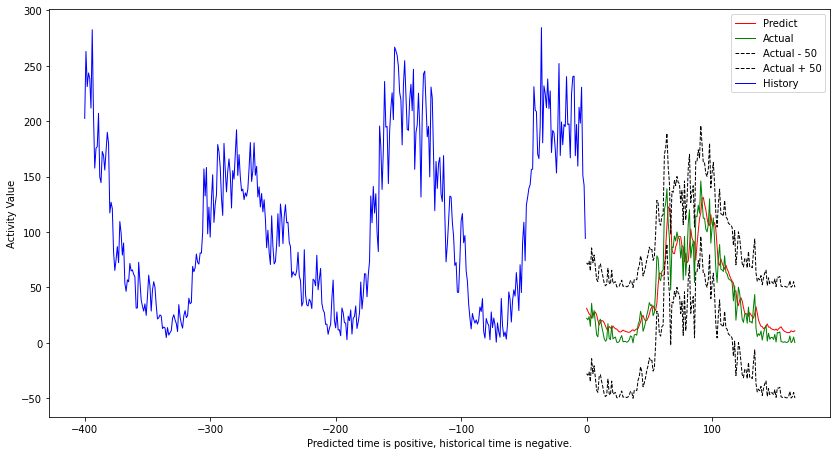

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 7.5)
real = np.array(data['yt'][0:3084]).reshape(-1)
test_reals = data['yt'][3085:3252].tolist()
history_time_length = 400
ahead = 167
plt.plot(range(0, ahead), pred1, '-r', label=u"Predict", linewidth=1)
plt.plot(range(0, ahead), test_reals[0:ahead], color='green', label=u"Actual", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) - 50, '--k',label=u"Actual - 50", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) + 50, '--k',label=u"Actual + 50", linewidth=1)
plt.plot(range(-history_time_length, 0),
                 real[len(real) - ahead - history_time_length - 1: len(real) - ahead - 1],
                 '-b', label=u"History", linewidth=1)
plt.xlabel(u"Predicted time is positive, historical time is negative.")
plt.ylabel(u"Activity Value")
plt.legend()
fig = plt.gcf()
plt.show()

## A Quick Recap
到目前为止，我们的数据都是以这样的形式出现的。$[例子,特征,时间步数=1]$ 我们把问题的框架定为每个样本的一个时间步数。对于每个时间步，我们传递了一个例子，所以对于$x[1]$，我们有:

In [13]:
x[1]

array([-0.30085384, -0.28829734, -0.53390256, -0.41386238, -0.47614264])

第一个值代表时间1时的缩放值$y_{t-1}$，第二个值$y_{t-2}$，以此类推。 对于$x[2]$，我们有：

In [14]:
x[2]

array([-0.20642893, -0.30085384, -0.28829734, -0.53390256, -0.41386238])

其中第一个值又代表$y_t$在时间2的滞后值。这与传统的时间序列数据建模方法相对应。为了将数据转化为这种格式，我们重新调整了输入数据的大小。

In [18]:
x_train = x_train.reshape( x_train.shape + (1 ,))
x_test = x_test.reshape( x_test.shape + (1 ,))

这样就把数据重新调整为$[实例、特征、时间步骤]$的格式。

## How to Use Multiple Time Steps
我们也可以使用多个时间步长来进行下一个时间步长的预测。在这种情况下，你会重塑输入数据，使其具有 $[examples, features=1, timesteps=5]$ 的形式。让我们来看看太阳黑子是什么样子的。
例如：

In [19]:
x_train = x[0: train_end ,]
x_test = x[ train_end +1:3252 ,]
y_train = y[0: train_end ]
y_test = y[ train_end +1:3252]
x_train = np.reshape( x_train , ( x_train.shape[0], 1 , x_train.shape[1]))
x_test = np.reshape( x_test , ( x_test.shape[0] , 1 , x_test.shape[1]))

In [20]:
x_train.shape

(3084, 1, 5)

In [21]:
x_test.shape

(167, 1, 5)

In [22]:
seed = 2020
num_epochs = 1
np.random.seed( seed )
fit2 = Sequential()
fit2.add( GRU( units=4,activation = 'tanh',recurrent_activation='hard_sigmoid',input_shape =(1 , 5)))
fit2.add( Dense( units=1 , activation = 'linear'))
fit2.compile( loss ="mean_squared_error", optimizer = "rmsprop" )
fit2.fit( x_train , y_train , batch_size=1 , epochs=num_epochs )

3084/3084 [==============================] - 7s 2ms/step - loss: 0.0263


In [23]:
score_train2 = fit2.evaluate(x_train, y_train, batch_size=1)
score_test2 = fit2.evaluate(x_test, y_test, batch_size=1)

167/167 [==============================] - 0s 1ms/step - loss: 0.0058


In [26]:
pred2 = fit2.predict(x_test)
pred2 = scaler_y.inverse_transform(np.array(pred2).reshape((len(pred2), 1)))

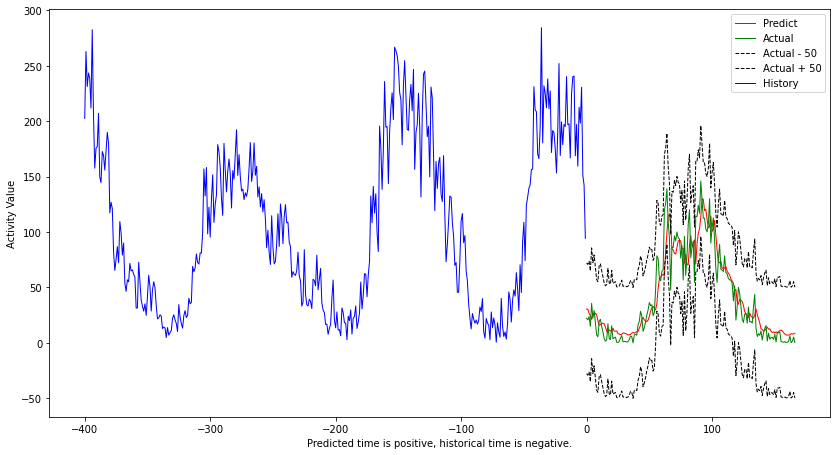

In [27]:
plt.rcParams['figure.figsize'] = (14.0, 7.5)
real = np.array(data['yt'][0:3084]).reshape(-1)
test_reals = data['yt'][3085:3252].tolist()
history_time_length = 400
ahead = 167
plt.plot(range(0, ahead), pred2, '-r', label=u"Predict", linewidth=1)
plt.plot(range(0, ahead), test_reals[0:ahead], color='green', label=u"Actual", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) - 50, '--k',label=u"Actual - 50", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) + 50, '--k',label=u"Actual + 50", linewidth=1)
plt.plot(range(-history_time_length, 0),
                 real[len(real) - ahead - history_time_length - 1: len(real) - ahead - 1],
                 '-b', label=u"History", linewidth=1)
plt.xlabel(u"Predicted time is positive, historical time is negative.")
plt.ylabel(u"Activity Value")
plt.legend()
fig = plt.gcf()
plt.show()